In [1]:
base = np.array([[1,1],[1,2],[4,1],[6,4]])
key = np.array([2,3])
def nearest_number(base,key):
    key_x,key_y = key
    distance = np.array([(key_x - base_x)**2 + (key_y-base_y)**2 for base_x, base_y in base])
    return np.argmax(distance),distance
def calculate_e(k):
    base = 1+1/k
    e = base
    for i in range(k):
        e = e*base
    return e
def calculate_e2(base, k):
    if k == 0:
        return 1
    elif k == 1:
        return base
    elif k%2 == 0:
        return calculate_e2(base*base,k/2)
    elif k%2 == 1:
        return base*calculate_e2(base*base,(k-1)/2)
def nearest_neighbor(k,array,target):
    x_target = target[0]
    y_target = target[1]
    distance_pop_dict={}
    sum_pop = 0
    for x,y,pop in array:
        distance = (x-x_target)**2+(y-y_target)**2
        distance_pop_dict[distance] = pop
    for key in sorted(distance_pop_dict)[:k]:
        sum_pop = sum_pop + distance_pop_dict[key]
    return sum_pop
def collect_cards():
    count = 0
    cards = list(range(160))
    collection = set()
    while len(collection) < 160:
        pack = np.random.choice(cards,size = 8,replace=False)
        count+=1
        collection = collection.union(set(pack))
    return count

In [2]:
import numpy as np
def collect_cards():
    count = 0
    cards = list(range(160))
    collection = set()
    while len(collection) < 160:
        pack = np.random.choice(cards,size = 8,replace=False)
        count+=1
        collection = collection.union(set(pack))
    return count

In [4]:
count_list = []
for n in range(1000):
    count_list.append(collect_cards())

In [6]:
np.mean(count_list)

110.419

In [13]:
rand_int = np.random.randint(0,2)

In [15]:
rand_int

1

In [13]:
def nearest_neighbor(k,array,target):
    x_target = target[0]
    y_target = target[1]
    distance_pop_dict={}
    sum_pop = 0
    for x,y,pop in array:
        distance = (x-x_target)**2+(y-y_target)**2
        distance_pop_dict[distance] = pop
    for key in sorted(distance_pop_dict)[:k]:
        sum_pop = sum_pop + distance_pop_dict[key]
    return sum_pop

In [14]:
array = [[1,2,5],[2,3,6],[3,5,4]]
nearest_neighbor(1,array,[2,4])

6

In [12]:
sorted(nearest_neighbor(1,array,[2,4]))

[1, 2, 5]

In [27]:
def calculate_e(k):
    base = 1+1/k
    e = base
    for i in range(k):
        e = e*base
    return e


def calculate_e2(base, k):
    if k == 0:
        return 1
    elif k == 1:
        return base
    elif k%2 == 0:
        return calculate_e2(base*base,k/2)
    elif k%2 == 1:
        return base*calculate_e2(base*base,(k-1)/2)

In [32]:
%timeit calculate_e(1000)

17.8 µs ± 141 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [33]:
base = base = 1+1/1000
%timeit calculate_e2(base,1000)

1.39 µs ± 7.91 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loss(k):
    people = np.arange(0.0, 1.0, 0.01)
    candidate_list = np.random.uniform(size=k)
    loss_list = [np.sum(np.square(candidate - people)) for candidate in candidate_list]
    loss_list = np.array(loss_list)
    assert len(loss_list) == len(candidate_list)
    return candidate_list,loss_list

In [3]:
candidate_list,loss_list= loss(1000)

Text(0, 0.5, 'loss')

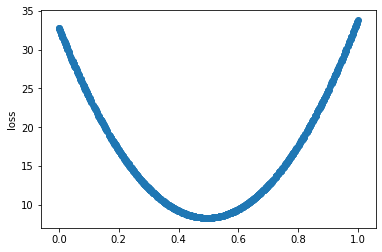

In [5]:
plt.scatter(candidate_list,loss_list)
plt.ylabel('loss')

In [6]:
import numpy as np

In [9]:
base = np.array([[1,1],[1,2],[4,1],[6,4]])
key = np.array([2,3])
def nearest_number(base,key):
    key_x,key_y = key
    distance = np.array([(key_x - base_x)**2 + (key_y-base_y)**2 for base_x, base_y in base])
    return np.argmax(distance),distance

def calculate_e(k):
    base = 1+1/k
    e = base
    for i in range(k):
        e = e*base
    return e


def calculate_e2(base, k):
    if k == 0:
        return 1
    elif k == 1:
        return base
    elif k%2 == 0:
        return calculate_e2(base*base,k/2)
    elif k%2 == 1:
        return base*calculate_e2(base*base,(k-1)/2)
    
def nearest_neighbor(k,array,target):
    x_target = target[0]
    y_target = target[1]
    distance_pop_dict={}
    sum_pop = 0
    for x,y,pop in array:
        distance = (x-x_target)**2+(y-y_target)**2
        distance_pop_dict[distance] = pop
    for key in sorted(distance_pop_dict)[:k]:
        sum_pop = sum_pop + distance_pop_dict[key]
    return sum_pop


def collect_cards():
    count = 0
    cards = list(range(160))
    collection = set()
    while len(collection) < 160:
        pack = np.random.choice(cards,size = 8,replace=False)
        count+=1
        collection = collection.union(set(pack))
    return count

In [10]:
nearest_number(base,key)

(3, array([ 5,  2,  8, 17]))

In [1]:
import playaround

My __name__ is: playaround
I'm imported!


In [17]:
def count_substring(string, sub_string):
    len_sub = len(sub_string)
    len_str = len(string)
    count = 0
    for i in range(len(string)):
        start = i
        end = i + len_sub
        if end > len_str:
            return count 
        elif string[start:end] == sub_string:
            count +=1
    return count

In [18]:
count_substring('ABCDCDC','CDC')

2

In [1]:
'-'*16

'----------------'

In [2]:
import string
alpha = string.ascii_lowercase

n = int(input())
L = []
for i in range(n):
    s = "-".join(alpha[i:n])
    L.append((s[::-1]+s[1:]).center(4*n-3, "-"))
print('\n'.join(L[:0:-1]+L))

5
--------e--------
------e-d-e------
----e-d-c-d-e----
--e-d-c-b-c-d-e--
e-d-c-b-a-b-c-d-e
--e-d-c-b-c-d-e--
----e-d-c-d-e----
------e-d-e------
--------e--------


In [3]:
L

['e-d-c-b-a-b-c-d-e',
 '--e-d-c-b-c-d-e--',
 '----e-d-c-d-e----',
 '------e-d-e------',
 '--------e--------']

In [8]:
L[:0:-1]

['--------e--------',
 '------e-d-e------',
 '----e-d-c-d-e----',
 '--e-d-c-b-c-d-e--']

In [13]:
L[::-]

['--e-d-c-b-c-d-e--',
 '----e-d-c-d-e----',
 '------e-d-e------',
 '--------e--------']

In [16]:
def print_rangoli(size):
    # your code goes here
    alpha_list = list(map(chr, range(97, 123)))
    L = []
    for i in range(size):
        line_char_list = '-'.join(alpha_list[i:size])
        L.append(line_char_list[::-1] + line_char_list[1:])
    return L

In [17]:
print_rangoli(5)

['e-d-c-b-a-b-c-d-e', 'e-d-c-b-c-d-e', 'e-d-c-d-e', 'e-d-e', 'e']

In [19]:
len("{0:b}".format(17))

5

In [23]:
"{0:b}".format(1)

'1'

In [24]:
"{1:b}".format(1,5)

'101'

In [25]:
'' + 'good'

'good'

In [27]:
list('good')[0].upper()

'G'

In [47]:
import string
def solve(s):
    print (string.capwords(s,' '))

In [48]:
solve('hello   world  lol')

Hello   World  Lol


In [50]:
a = ['g']*3

In [52]:
a[[True,True,False]]

TypeError: list indices must be integers or slices, not list